# Sobre o desafio

Na reunião inicial com as pessoas responsáveis pela área de vendas da empresa, foi explicada a importância de se reduzir a Taxa de Evasão de Clientes, conhecido como Churn Rate. Basicamente, o Churn Rate indica o quanto a empresa perdeu de receita ou clientes em um período de tempo.

Com sua experiência, você sugere, como passo inicial, a identificação de clientes que teriam uma maior chance de deixar a empresa. Para isso, você explica que é interessante investigar algumas características de clientes ou dos planos de clientes para tentar CLASSIFICAR estas pessoas como potenciais candidatas a deixar a empresa ou não.


### Importando as bibliotecas 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
url = 'https://raw.githubusercontent.com/sthemonica/alura-voz/main/Dados/Telco-Customer-Churn.json'
dados = pd.read_json(url)

In [3]:
dados.head(5)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [4]:
dados.shape

(7267, 6)

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [6]:
dados.isna().count()

customerID    7267
Churn         7267
customer      7267
phone         7267
internet      7267
account       7267
dtype: int64

In [7]:
pd.DataFrame(dados.customer.items())

,0,1
0,0,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part..."
1,1,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne..."
2,2,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne..."
3,3,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne..."
4,4,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part..."
...,...,...
7262,7262,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part..."
7263,7263,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne..."
7264,7264,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne..."
7265,7265,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne..."


# Limpeza dos dados

### Separando as colunas: customer, phone, internet, account
Tirando de dicionário e transformando em uma coluna

O processo foi realizado um a um

In [8]:
print(dados.customer.loc[0])
print('-'*60)
print(dados.phone.loc[0])
print('-'*60)
print(dados.internet.loc[0])
print('-'*60)
print(dados.account.loc[0])

{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 9}
------------------------------------------------------------
{'PhoneService': 'Yes', 'MultipleLines': 'No'}
------------------------------------------------------------
{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'Yes', 'DeviceProtection': 'No', 'TechSupport': 'Yes', 'StreamingTV': 'Yes', 'StreamingMovies': 'No'}
------------------------------------------------------------
{'Contract': 'One year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}


In [9]:
#pd.json_normalize(dados.customer)
dados = pd.concat([dados.drop(['customer'], axis=1), dados['customer'].apply(pd.Series)], axis=1)
dados.head(5)

,customerID,Churn,phone,internet,account,gender,SeniorCitizen,Partner,Dependents,tenure
0,0002-ORFBO,No,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,9
1,0003-MKNFE,No,"{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,9
2,0004-TLHLJ,Yes,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,4
3,0011-IGKFF,Yes,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,13
4,0013-EXCHZ,Yes,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,3


In [10]:
dados = pd.concat([dados.drop(['phone'], axis=1), dados['phone'].apply(pd.Series)], axis=1)
dados.head(1)

,customerID,Churn,internet,account,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines
0,0002-ORFBO,No,"{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,9,Yes,No


In [11]:
dados = pd.concat([dados.drop(['internet'], axis=1), dados['internet'].apply(pd.Series)], axis=1)
dados.head(1)

,customerID,Churn,account,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,0002-ORFBO,No,"{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No


In [12]:
dados = pd.concat([dados.drop(['account'], axis=1), dados['account'].apply(pd.Series)], axis=1)
dados.head(1)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}"


In [13]:
dados = pd.concat([dados.drop(['Charges'], axis=1), dados['Charges'].apply(pd.Series)], axis=1)
dados.head(1)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3


In [14]:
pd.set_option('display.max_columns', 25)

##### No momento temos 21 linhas

In [15]:
dados.shape

(7267, 21)

In [16]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


##### Dicionário de dados
customerID: número de identificação único de cada cliente

Churn: se o cliente deixou ou não a empresa

gender: gênero (masculino e feminino)

SeniorCitizen: informação sobre um cliente ter ou não idade igual ou maior que 65 anos

Partner: se o cliente possui ou não um parceiro ou parceira

Dependents: se o cliente possui ou não dependentes

tenure: meses de contrato do cliente

PhoneService: assinatura de serviço telefônico

MultipleLines: assisnatura de mais de uma linha de telefone

InternetService: assinatura de um provedor internet

OnlineSecurity: assinatura adicional de segurança online

OnlineBackup: assinatura adicional de backup online

DeviceProtection: assinatura adicional de proteção no dispositivo

TechSupport: assinatura adicional de suporte técnico, menos tempo de espera

StreamingTV: assinatura de TV a cabo

StreamingMovies: assinatura de streaming de filmes

Contract: tipo de contrato

PaperlessBilling: se o cliente prefere receber online a fatura

PaymentMethod: forma de pagamento

Charges.Monthly: total de todos os serviços do cliente por mês

Charges.Total: total gasto pelo cliente

In [17]:
#renomeando as colunas para o português
dados.columns = ['id_consumidor', 'churn', 'genero', 'idoso', 'relacionando', 'dependente', 'meses_contrato','servico_telefonico', 'multiplanos',
                'servico_internet','seguranca_online','backup_online','protecao_aparelho','suporte_tecnico','tv_a_cabo','streaming_filme',
                'tipo_de_contrato','fatura_sem_papel','metodo_pagamento', 'valor_mensal','valor_total']


In [18]:
dados.multiplanos.unique()

array(['No', 'Yes', 'No phone service'], dtype=object)

In [19]:
dados.head(5)

,id_consumidor,churn,genero,idoso,relacionando,dependente,meses_contrato,servico_telefonico,multiplanos,servico_internet,seguranca_online,backup_online,protecao_aparelho,suporte_tecnico,tv_a_cabo,streaming_filme,tipo_de_contrato,fatura_sem_papel,metodo_pagamento,valor_mensal,valor_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [20]:
#tratando a coluna de valor total. Deixando no formato float
# convert column "a" of a DataFrame
#df["a"] = pd.to_numeric(df["a"])

dados['valor_total'] = dados['valor_total'].replace(",",".", regex=True)
dados['valor_total'] = dados['valor_total'].replace(" ","0", regex=True)
dados.valor_total = pd.to_numeric(dados.valor_total)
print(dados['valor_total'].dtypes)

float64


In [21]:
round(dados.describe(), 2)

,idoso,meses_contrato,valor_mensal,valor_total
count,7267.00,7267.00,7267.00,7267.00
mean,0.16,32.35,64.72,2277.18
std,0.37,24.57,30.13,2268.65
min,0.00,0.00,18.25,0.00
25%,0.00,9.00,35.42,396.20
50%,0.00,29.00,70.30,1389.20
75%,0.00,55.00,89.88,3778.52
max,1.00,72.00,118.75,8684.80


In [22]:
#traduzindo os dados:
sim_nao = {'No': 'Não', 
           'Yes': 'Sim'}

sim_nao_sem = {'No': 'Não', 'Yes': 'Sim', 'No internet service': 'Sem serviço de internet'}

tipo_servico = {'DSL': 'DSL', 
           'Fiber optic': 'Fibra ótica',
               'No': 'Sem'}
tipo_multiplanos = {'No': 'Não', 'Yes': 'Sim', 'No phone service': 'Sem serviço telefônico'}

tipo_contrato = {'One year' : 'Anual', 'Month-to-month': 'Mensal', 'Two year': 'Dois anos'}

tipo_pagamento = {'Mailed check' : 'Carta enviada', 'Electronic check': 'E-mail enviado', 'Credit card (automatic)': 'Crédito automático',
                 'Bank transfer (automatic)': 'Transferência bancária automática'}

tipo_churn = {'No' : 0, 'Yes': 1, '': 'Em branco'}

masc_fem = {'Female': 'Feminino', 'Male': 'Masculino'}



In [23]:
#utilizando a função map para traduzir os valores
dados.relacionando = dados.relacionando.map(sim_nao)
dados.dependente = dados.dependente.map(sim_nao)
dados.servico_telefonico = dados.servico_telefonico.map(sim_nao)
dados.fatura_sem_papel = dados.fatura_sem_papel.map(sim_nao)

dados.multiplanos = dados.multiplanos.map(tipo_multiplanos)

dados.backup_online = dados.backup_online.map(sim_nao_sem)
dados.protecao_aparelho = dados.protecao_aparelho.map(sim_nao_sem)
dados.suporte_tecnico = dados.suporte_tecnico.map(sim_nao_sem)
dados.tv_a_cabo = dados.tv_a_cabo.map(sim_nao_sem)
dados.streaming_filme = dados.streaming_filme.map(sim_nao_sem)
dados.seguranca_online = dados.seguranca_online.map(sim_nao_sem)

dados.servico_internet = dados.servico_internet.map(tipo_servico)
dados.genero = dados.genero.map(masc_fem)
dados.tipo_de_contrato = dados.tipo_de_contrato.map(tipo_contrato)
dados.metodo_pagamento = dados.metodo_pagamento.map(tipo_pagamento)
dados.churn = dados.churn.map(tipo_churn)


##### Apagando os churns em branco

In [24]:
churn_branco = dados[dados.churn =='Em branco']
churn_branco

,id_consumidor,churn,genero,idoso,relacionando,dependente,meses_contrato,servico_telefonico,multiplanos,servico_internet,seguranca_online,backup_online,protecao_aparelho,suporte_tecnico,tv_a_cabo,streaming_filme,tipo_de_contrato,fatura_sem_papel,metodo_pagamento,valor_mensal,valor_total
30,0047-ZHDTW,Em branco,Feminino,0,Não,Não,11,Sim,Sim,Fibra ótica,Sim,Não,Não,Não,Não,Não,Mensal,Sim,Transferência bancária automática,79.00,929.30
75,0120-YZLQA,Em branco,Masculino,0,Não,Não,71,Sim,Não,Sem,Sem serviço de internet,Sem serviço de internet,Sem serviço de internet,Sem serviço de internet,Sem serviço de internet,Sem serviço de internet,Dois anos,Sim,Crédito automático,19.90,1355.10
96,0154-QYHJU,Em branco,Masculino,0,Não,Não,29,Sim,Não,DSL,Sim,Sim,Não,Sim,Não,Não,Anual,Sim,E-mail enviado,58.75,1696.20
98,0162-RZGMZ,Em branco,Feminino,1,Não,Não,5,Sim,Não,DSL,Sim,Sim,Não,Sim,Não,Não,Mensal,Não,Crédito automático,59.90,287.85
175,0274-VVQOQ,Em branco,Masculino,1,Sim,Não,65,Sim,Sim,Fibra ótica,Não,Sim,Sim,Não,Sim,Sim,Anual,Sim,Transferência bancária automática,103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,Em branco,Feminino,0,Não,Não,14,Sim,Sim,DSL,Não,Sim,Não,Não,Não,Não,Anual,Sim,Carta enviada,54.25,773.20
7180,9872-RZQQB,Em branco,Feminino,0,Sim,Não,49,Não,Sem serviço telefônico,DSL,Sim,Não,Não,Não,Sim,Não,Mensal,Não,Transferência bancária automática,40.65,2070.75
7211,9920-GNDMB,Em branco,Masculino,0,Não,Não,9,Sim,Sim,Fibra ótica,Não,Não,Não,Não,Não,Não,Mensal,Sim,E-mail enviado,76.25,684.85
7239,9955-RVWSC,Em branco,Feminino,0,Sim,Sim,67,Sim,Não,Sem,Sem serviço de internet,Sem serviço de internet,Sem serviço de internet,Sem serviço de internet,Sem serviço de internet,Sem serviço de internet,Dois anos,Sim,Transferência bancária automática,19.25,1372.90


In [25]:
dados = dados.drop(index = churn_branco.index)

In [26]:
dados.churn = pd.to_numeric(dados.churn)
print(dados['churn'].dtypes)

int64


In [27]:
dados.shape[0]

7043

In [28]:
#visualizando os dados
dados.head(5)

,id_consumidor,churn,genero,idoso,relacionando,dependente,meses_contrato,servico_telefonico,multiplanos,servico_internet,seguranca_online,backup_online,protecao_aparelho,suporte_tecnico,tv_a_cabo,streaming_filme,tipo_de_contrato,fatura_sem_papel,metodo_pagamento,valor_mensal,valor_total
0,0002-ORFBO,0,Feminino,0,Sim,Sim,9,Sim,Não,DSL,Não,Sim,Não,Sim,Sim,Não,Anual,Sim,Carta enviada,65.6,593.30
1,0003-MKNFE,0,Masculino,0,Não,Não,9,Sim,Sim,DSL,Não,Não,Não,Não,Não,Sim,Mensal,Não,Carta enviada,59.9,542.40
2,0004-TLHLJ,1,Masculino,0,Não,Não,4,Sim,Não,Fibra ótica,Não,Não,Sim,Não,Não,Não,Mensal,Sim,E-mail enviado,73.9,280.85
3,0011-IGKFF,1,Masculino,1,Sim,Não,13,Sim,Não,Fibra ótica,Não,Sim,Sim,Não,Sim,Sim,Mensal,Sim,E-mail enviado,98.0,1237.85
4,0013-EXCHZ,1,Feminino,1,Sim,Não,3,Sim,Não,Fibra ótica,Não,Não,Não,Sim,Sim,Não,Mensal,Sim,Carta enviada,83.9,267.40


In [29]:
#criando uma coluna de gasto diário e a colocando na posição 18
dados['gasto_diario'] = round((dados['valor_total']) / (dados['meses_contrato']*30),2)
dados


,id_consumidor,churn,genero,idoso,relacionando,dependente,meses_contrato,servico_telefonico,multiplanos,servico_internet,seguranca_online,backup_online,protecao_aparelho,suporte_tecnico,tv_a_cabo,streaming_filme,tipo_de_contrato,fatura_sem_papel,metodo_pagamento,valor_mensal,valor_total,gasto_diario
0,0002-ORFBO,0,Feminino,0,Sim,Sim,9,Sim,Não,DSL,Não,Sim,Não,Sim,Sim,Não,Anual,Sim,Carta enviada,65.60,593.30,2.20
1,0003-MKNFE,0,Masculino,0,Não,Não,9,Sim,Sim,DSL,Não,Não,Não,Não,Não,Sim,Mensal,Não,Carta enviada,59.90,542.40,2.01
2,0004-TLHLJ,1,Masculino,0,Não,Não,4,Sim,Não,Fibra ótica,Não,Não,Sim,Não,Não,Não,Mensal,Sim,E-mail enviado,73.90,280.85,2.34
3,0011-IGKFF,1,Masculino,1,Sim,Não,13,Sim,Não,Fibra ótica,Não,Sim,Sim,Não,Sim,Sim,Mensal,Sim,E-mail enviado,98.00,1237.85,3.17
4,0013-EXCHZ,1,Feminino,1,Sim,Não,3,Sim,Não,Fibra ótica,Não,Não,Não,Sim,Sim,Não,Mensal,Sim,Carta enviada,83.90,267.40,2.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Feminino,0,Não,Não,13,Sim,Não,DSL,Sim,Não,Não,Sim,Não,Não,Anual,Não,Carta enviada,55.15,742.90,1.90
7263,9992-RRAMN,1,Masculino,0,Sim,Não,22,Sim,Sim,Fibra ótica,Não,Não,Não,Não,Não,Sim,Mensal,Sim,E-mail enviado,85.10,1873.70,2.84
7264,9992-UJOEL,0,Masculino,0,Não,Não,2,Sim,Não,DSL,Não,Sim,Não,Não,Não,Não,Mensal,Sim,Carta enviada,50.30,92.75,1.55
7265,9993-LHIEB,0,Masculino,0,Sim,Sim,67,Sim,Não,DSL,Sim,Não,Sim,Sim,Não,Sim,Dois anos,Não,Carta enviada,67.85,4627.65,2.30


In [30]:
dados = dados [['id_consumidor', 'churn', 'genero', 'idoso', 'relacionando', 'dependente', 'meses_contrato','servico_telefonico', 'multiplanos',
                'servico_internet','seguranca_online','backup_online','protecao_aparelho','suporte_tecnico','tv_a_cabo','streaming_filme',
                'tipo_de_contrato','fatura_sem_papel','metodo_pagamento','gasto_diario', 'valor_mensal','valor_total']]

In [31]:
dados.describe()

,churn,idoso,meses_contrato,gasto_diario,valor_mensal,valor_total
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000
mean,0.265370,0.162147,32.371149,2.159878,64.761692,2279.734304
std,0.441561,0.368612,24.559481,1.006210,30.090047,2266.794470
min,0.000000,0.000000,0.000000,0.460000,18.250000,0.000000
25%,0.000000,0.000000,9.000000,1.207500,35.500000,398.550000
50%,0.000000,0.000000,29.000000,2.350000,70.350000,1394.550000
75%,1.000000,0.000000,55.000000,3.010000,89.850000,3786.600000
max,1.000000,1.000000,72.000000,4.050000,118.750000,8684.800000


In [32]:
#apagando os dados com gasto de zero
gasto_zero = dados[dados.valor_total == 0]
print(len(gasto_zero))
gasto_zero

11


,id_consumidor,churn,genero,idoso,relacionando,dependente,meses_contrato,servico_telefonico,multiplanos,servico_internet,seguranca_online,backup_online,protecao_aparelho,suporte_tecnico,tv_a_cabo,streaming_filme,tipo_de_contrato,fatura_sem_papel,metodo_pagamento,gasto_diario,valor_mensal,valor_total
975,1371-DWPAZ,0,Feminino,0,Sim,Sim,0,Não,Sem serviço telefônico,DSL,Sim,Sim,Sim,Sim,Sim,Não,Dois anos,Não,Crédito automático,NaN,56.05,0.0
1775,2520-SGTTA,0,Feminino,0,Sim,Sim,0,Sim,Não,Sem,Sem serviço de internet,Sem serviço de internet,Sem serviço de internet,Sem serviço de internet,Sem serviço de internet,Sem serviço de internet,Dois anos,Não,Carta enviada,NaN,20.00,0.0
1955,2775-SEFEE,0,Masculino,0,Não,Sim,0,Sim,Sim,DSL,Sim,Sim,Não,Sim,Não,Não,Dois anos,Sim,Transferência bancária automática,NaN,61.90,0.0
2075,2923-ARZLG,0,Masculino,0,Sim,Sim,0,Sim,Não,Sem,Sem serviço de internet,Sem serviço de internet,Sem serviço de internet,Sem serviço de internet,Sem serviço de internet,Sem serviço de internet,Anual,Sim,Carta enviada,NaN,19.70,0.0
2232,3115-CZMZD,0,Masculino,0,Não,Sim,0,Sim,Não,Sem,Sem serviço de internet,Sem serviço de internet,Sem serviço de internet,Sem serviço de internet,Sem serviço de internet,Sem serviço de internet,Dois anos,Não,Carta enviada,NaN,20.25,0.0
2308,3213-VVOLG,0,Masculino,0,Sim,Sim,0,Sim,Sim,Sem,Sem serviço de internet,Sem serviço de internet,Sem serviço de internet,Sem serviço de internet,Sem serviço de internet,Sem serviço de internet,Dois anos,Não,Carta enviada,NaN,25.35,0.0
2930,4075-WKNIU,0,Feminino,0,Sim,Sim,0,Sim,Sim,DSL,Não,Sim,Sim,Sim,Sim,Não,Dois anos,Não,Carta enviada,NaN,73.35,0.0
3134,4367-NUYAO,0,Masculino,0,Sim,Sim,0,Sim,Sim,Sem,Sem serviço de internet,Sem serviço de internet,Sem serviço de internet,Sem serviço de internet,Sem serviço de internet,Sem serviço de internet,Dois anos,Não,Carta enviada,NaN,25.75,0.0
3203,4472-LVYGI,0,Feminino,0,Sim,Sim,0,Não,Sem serviço telefônico,DSL,Sim,Não,Sim,Sim,Sim,Não,Dois anos,Sim,Transferência bancária automática,NaN,52.55,0.0
4169,5709-LVOEQ,0,Feminino,0,Sim,Sim,0,Sim,Não,DSL,Sim,Sim,Sim,Não,Sim,Sim,Dois anos,Não,Carta enviada,NaN,80.85,0.0


In [33]:

dados = dados.drop(index=gasto_zero.index)


In [34]:
dados.shape

(7032, 22)

# Criando as visualizações
Abaixo temos algumas visualizações que irão gerar insights

Vemos que não existe correlação alta com o churn, mas a correlação do churn com o tempo de contrato (-0.35) é algo que nos chama a atenção

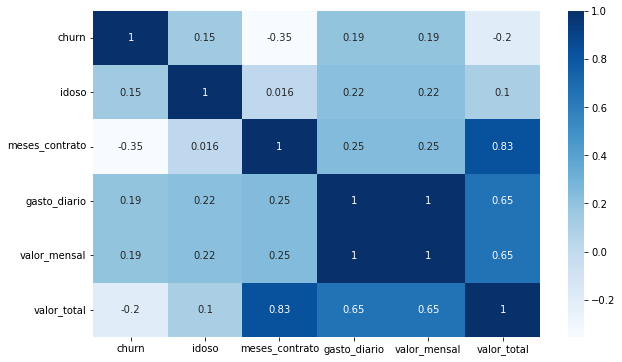

In [35]:
#correlação dos dados com um heatmap
plt.figure(figsize=(10,6))
ax = sns.heatmap(dados.corr(), annot = True, cmap='Blues')


Text(0, 0.5, 'Tempo de contrato em meses')

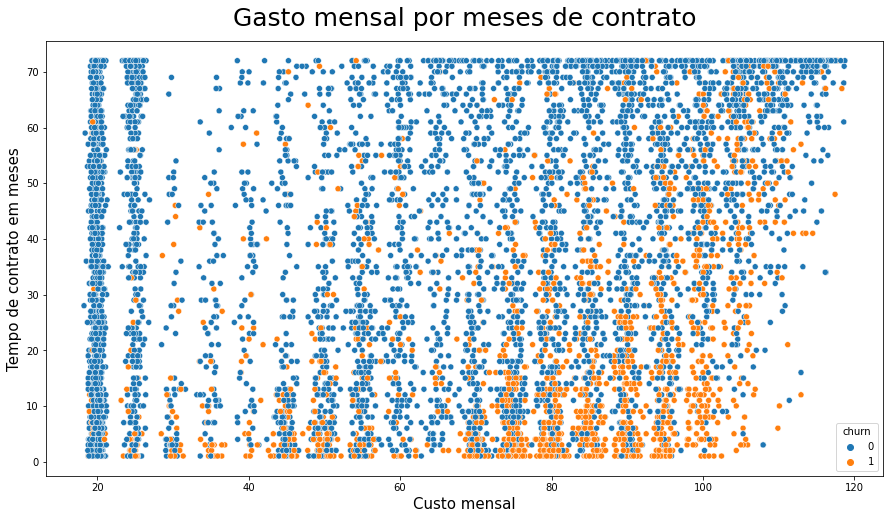

In [97]:
#valor médio mensal de quem cancela
fig = plt.figure(figsize=(15,8))
ax = sns.scatterplot(x= 'valor_mensal', y='meses_contrato', data = dados, hue='churn')
ax.set_title('Gasto mensal por meses de contrato', fontsize=25, pad=15)
ax.set_xlabel('Custo mensal', fontsize=15)
ax.set_ylabel('Tempo de contrato em meses', fontsize=15)

No gráfico acima é possível visualizar que as pessoas que assinam o plano mais caro, tendem a cancelar logo no primeiro mês. Já as pessoas com plano básico, tendem a ser mais fieis a empresa.

Já no gráfico abaixo, podemos entender que as pessoas tendem a cancelar no primeiro mês de uso

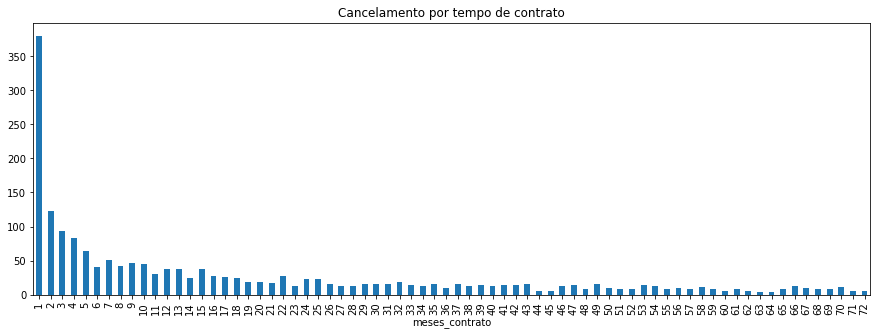

In [100]:
#cancelamento por tempo
churn_sim = dados[dados.churn ==1]
churn_sim = churn_sim.groupby('meses_contrato').count()['churn']
churn_sim

plt.figure(figsize=(15,5))
ax = churn_sim.plot(kind='bar')
plt.title('Cancelamento por tempo de contrato')
plt.show()

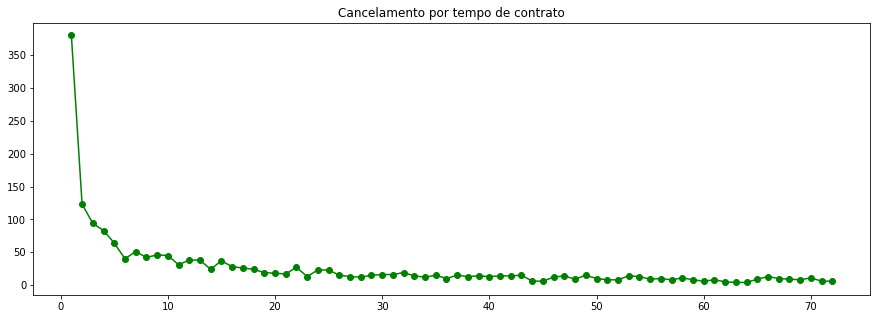

In [38]:
plt.figure(figsize=(15,5))
plt.title('Cancelamento por tempo de contrato')
plt.plot(churn_sim, color='green', linestyle='solid', marker ='o')
plt.show()

Abaixo temos a análise de alguns perfis

Churn = 0 - continua cliente

Churn = 1 - teve a conta cancelada

A partir desses perfis, podemos ver que:

    1) clientes que recebem a fatura por e-mail, tendem a cancelar
    2) a maioria dos clientes que cancelam, são aqueles que fazem o plano mensal, ou seja, não são fidelizados
    3) cliente com internet fibra ótica são os que mais cancelam

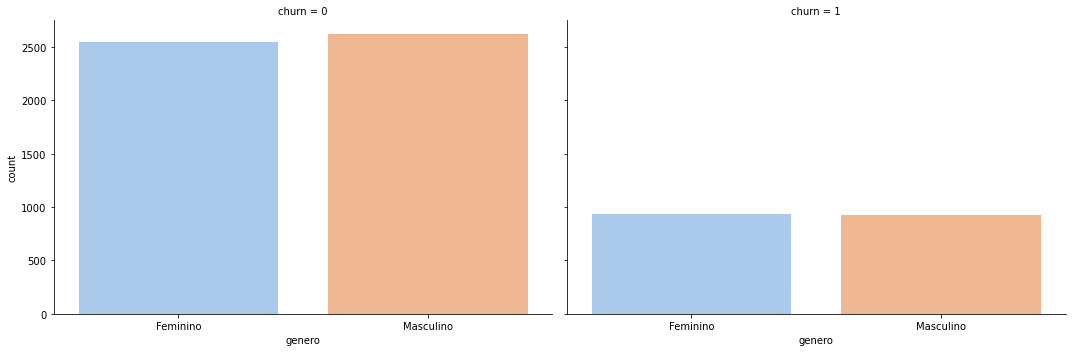

In [92]:
#genero
g = sns.catplot(x='genero', col='churn', data=dados,
                kind='count', height=5, aspect=1.5, palette='pastel')

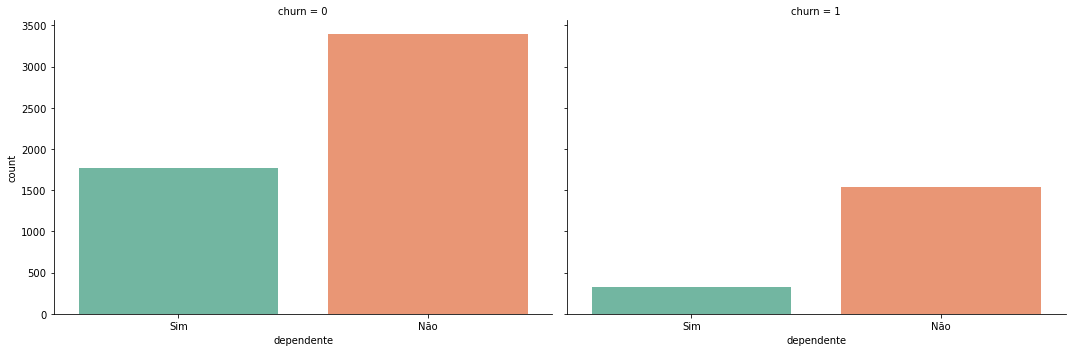

In [85]:
#perfil de quem tem dependente
g = sns.catplot(x='dependente', col='churn', data=dados,
                kind='count', height=5, aspect=1.5, palette="Set2")

<AxesSubplot:title={'center':'Método de pagamento'}, xlabel='metodo_pagamento', ylabel='count'>

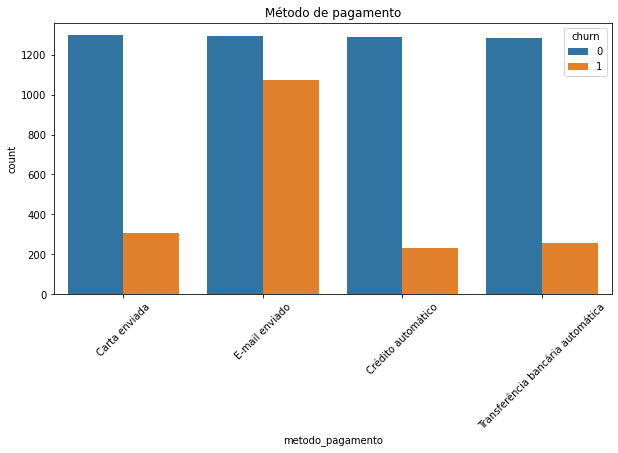

In [63]:
#método de pagamento
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
plt.title('Método de pagamento')
sns.countplot(x='metodo_pagamento', hue = 'churn', data=dados)

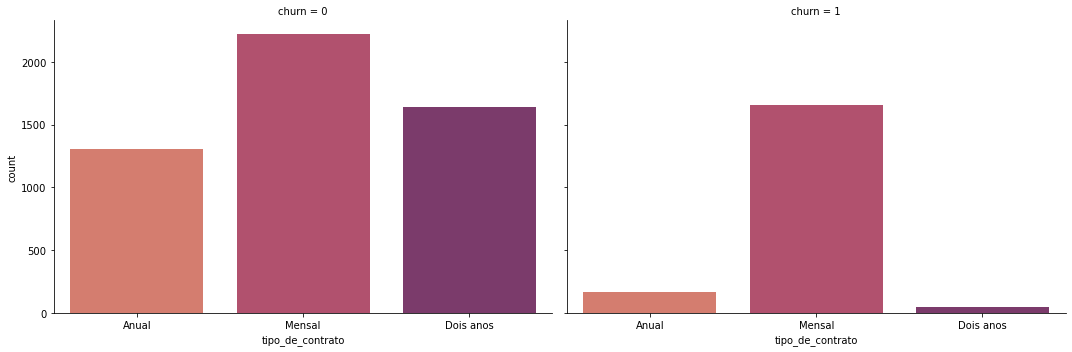

In [74]:
#tipo de contrato
g = sns.catplot(x='tipo_de_contrato', col='churn', data=dados,
                kind='count', height=5, aspect=1.5, palette="flare")

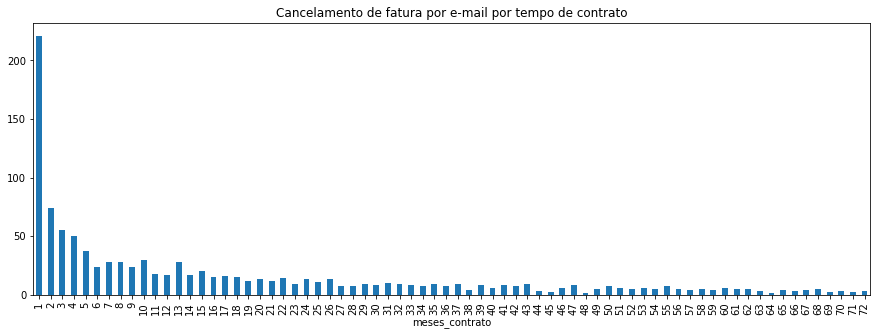

In [108]:
#análise dos clientes com contrato mensal, para saber em média em quanto tempo eles cancelam
churn_sim = dados[(dados.churn ==1) & (dados.metodo_pagamento == 'E-mail enviado')]
churn_sim = churn_sim.groupby('meses_contrato').count()['churn']
churn_sim

plt.figure(figsize=(15,5))
ax = churn_sim.plot(kind='bar')
plt.title('Cancelamento de fatura por e-mail por tempo de contrato')
plt.show()

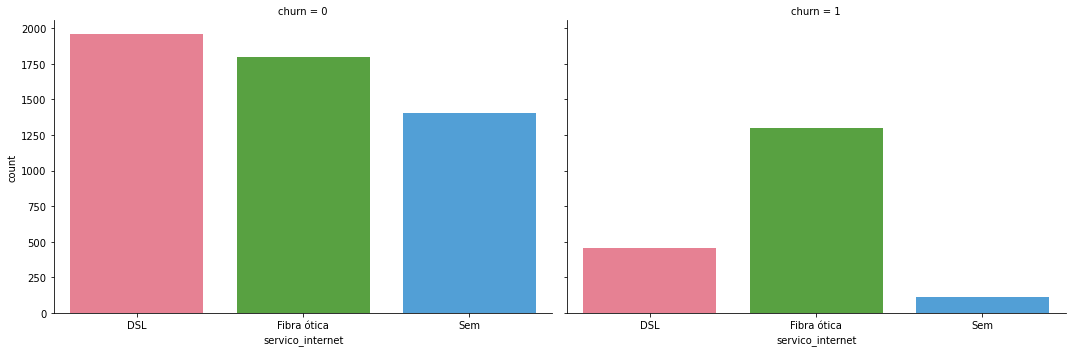

In [87]:
#serviço de internet
g = sns.catplot(x='servico_internet', col='churn', data=dados,
                kind='count', height=5, aspect=1.5, palette="husl")